# Data Science - CS 328 - Homework 1
# Name and Instructions 
**Name**:Aryan Solanki <br>
**Roll number**: 23110049 (BTech 2023-27)

**Colaborators**: - Nupoor (23110224), Nishchay (23110222)

### Details
Your submission should be a single Jupyter notebook containing all the answers and the code. Use mark-
down or LateX for the answers to the theoretical questions. You can, of course, work on Colab and submit
the resulting notebook after downloading it.
Copying code is not allowed, from others or any sources. Discussion with others is okay, but everything,
both code and answers, has be be developed individually. Also give names of all collaborators.

### Imports

In [1]:
import numpy as np 
import pandas as pd

from sklearn.cluster import KMeans


import numpy as np 
import struct
from array import array
from os.path  import join
%matplotlib inline
import random
import matplotlib.pyplot as plt

# Question 1 

Suppose you define a clustering objective in the following manner – give a partitioning 
$\mathcal{C} = \{C_1, \dots, C_k\}$, define

$$
\text{cost}(\mathcal{C}) = \sum_i \frac{1}{|C_i|} \sum_{x,y \in C_i} \|x - y\|_2^2
$$

i.e. cost a cluster is the sum of all pairwise squared distances. Give an algorithm for this.



## Solution

We aim to show that the given cost function for \( k \)-means clustering  

$$
\text{cost}(\mathcal{C}) = \sum_i \frac{1}{|C_i|} \sum_{x,y \in C_i} \|x - y\|_2^2
$$

is equivalent to the standard \( k \)-means objective, which minimizes the sum of squared Euclidean distances from each point to its cluster mean:

$$
\sum_i \sum_{x \in C_i} \|x - \mu_i\|_2^2,
$$

where \( \mu_i \) is the mean of cluster \( C_i \), defined as:

$$
\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x.
$$

### Step-by-Step Proof:

#### Step 1: Expand the Given Cost Function
Expanding the squared Euclidean norm inside the sum:

$$
\sum_{x,y \in C_i} \|x - y\|_2^2 = \sum_{x,y \in C_i} \left( \|x\|_2^2 + \|y\|_2^2 - 2 \langle x, y \rangle \right).
$$

Using the trick of adding and subtracting $( \mu )$:

$$
\sum_{x,y \in C_i} \|x - y\|_2^2 = \sum_{x,y \in C_i} \| (x - \mu) + (\mu - y) \|_2^2.
$$

Using the property \( \|a + b\|_2^2 = \|a\|_2^2 + \|b\|_2^2 + 2 \langle a, b \rangle \), we get:

$$
\sum_{x,y \in C_i} \|x - y\|_2^2 = \sum_{x,y \in C_i} \left( \|x - \mu\|_2^2 + \|\mu - y\|_2^2 + 2 \langle x - \mu, \mu - y \rangle \right).
$$

Now, splitting the sums:

$$
\sum_{x,y \in C_i} \|x - y\|_2^2 = \sum_{x,y \in C_i} \|x - \mu\|_2^2 + \sum_{x,y \in C_i} \|\mu - y\|_2^2 + 2 \sum_{x,y \in C_i} \langle x - \mu, \mu - y \rangle.
$$

Since the inner product term simplifies to zero due to the definition of the mean $( \mu )$, we are left with:

$$
\sum_{x,y \in C_i} \|x - y\|_2^2 = \sum_{x,y \in C_i} \|x - \mu\|_2^2 + \sum_{x,y \in C_i} \|\mu - y\|_2^2.
$$

By symmetry of summation indices:

$$
\sum_{x,y \in C_i} \|x - \mu\|_2^2 = \sum_{x,y \in C_i} \|\mu - y\|_2^2.
$$

Thus, rewriting:

$$
\sum_{x,y \in C_i} \|x - y\|_2^2 = 2 \sum_{x,y \in C_i} \|x - \mu\|_2^2.
$$

Now, dividing by $( |C_i| )$:

$$
\frac{1}{|C_i|} \sum_{x,y \in C_i} \|x - y\|_2^2 = \frac{2}{|C_i|} \sum_{x,y \in C_i} \|x - \mu\|_2^2.
$$

Hence the standard \( k \)-means cost function is:

$$
\sum_i \sum_{x \in C_i} \|x - \mu_i\|_2^2,
$$

we conclude:

$$
\text{cost}(\mathcal{C}) = 2 \times \text{(standard k-means cost)}.
$$

Thus, the given cost function is equivalent to the standard \( k \)-means objective up to a factor of 2.

#### Important Definitions 

- `C` is a list with numpy arrays. 
- Each numpy array is 2d with some n x m. One numpy array represents a single cluster. 
- n rows represent, n points, and m represents the dimension of each of those points. 
- Hence, C[0] represents the first cluster. C[1] the second and so on. 
- `objective(C)` takes the current set of clusters, and returns the the `cost` and another list `centers`. 
- every element of `centers` is a m dimensionsal vector. This indicates the center of this given cluster combination. 
- `cost` is the cost calculated by the objective function. 
- `calculate_kmeans(C,num_iterations=5)` is the function that calculates the next cluster arrangement. It returns the final cluster as C. 
- let `calculate_kmeans(C, num_iterations=5)` use objective and print the cost for each cluster and also be able to get the centers. 

In [2]:
def objective(C):
    """
    Computes the K-means objective function.

    Parameters:
    - C: list of numpy arrays, each representing a cluster.

    Returns:
    - cost: float, the total cost of clustering.
    - centers: list of numpy arrays, where each numpy array represents the cluster center.
    """
    centers = []
    total_cost = 0

    for cluster in C: #iterating on o
        if len(cluster) == 0:
            #If cluster is empty, use a zero vector as its center
            center = np.zeros(C[0].shape[1])
        else:
            #mean of each cluster/column
            center = np.mean(cluster, axis=0)
        
        centers.append(center)

        #distance from mean, summed
        cost = 0
        for x in cluster:
            distance = np.linalg.norm(x - center) 
            cost += distance**2  
        
        total_cost += cost

    return total_cost, centers

In [3]:
def assign_clusters(X, centers):
    """
    Assigns each data point to the nearest cluster center.

    Parameters:
    - X: numpy array of shape (N, m), where N is the number of points.
    - centers: list of numpy arrays representing cluster centers.

    Returns:
    - C: list of numpy arrays, where each array contains the points in a cluster.
    """
    k = len(centers)  
    clusters = [[] for _ in range(k)]  #empty clusters

    for x in X:
        #point distance from centers
        distances = []
        for center in centers:
            distance = np.linalg.norm(x - center)
            distances.append(distance)

        #index of closest center
        closest_center = np.argmin(distances)
        clusters[closest_center].append(x)

    C = [np.array(cluster) for cluster in clusters]
    return C

In [4]:
def calculate_kmeans(X, k, num_iterations=5):
    """
    Runs the K-means algorithm to find clusters.

    Parameters:
    - X: numpy array of shape (N, m), where N is the number of points.
    - k: int, number of clusters.
    - num_iterations: int, number of iterations.

    Returns:
    - C: final list of clusters.
    """
    #intial center selection (random)
    rng = np.random.default_rng(seed=2)
    initial_indices = rng.choice(X.shape[0], size=k, replace=False)
    centers = [X[i] for i in initial_indices]  # Initial cluster centers

    for i in range(num_iterations):
        #assignment
        C = assign_clusters(X, centers)
        #cost 
        cost, centers = objective(C)

        print(f"Iteration {i+1}, Cost: {cost}")

    return C

### Testing Sklearn vs our code

In [5]:
np.random.seed(2)
X = np.vstack([
    np.random.normal(loc=[2, 2], scale=1.0, size=(50, 2)),   # Cluster 1
    np.random.normal(loc=[8, 8], scale=1.0, size=(50, 2)),   # Cluster 2
    np.random.normal(loc=[14, 14], scale=1.0, size=(50, 2))  # Cluster 3
])

In [6]:
num_clusters = 3
final_clusters = calculate_kmeans(X, k=num_clusters, num_iterations=10)

Iteration 1, Cost: 2000.8783591490162
Iteration 2, Cost: 1897.597396138707
Iteration 3, Cost: 1889.9407980393114
Iteration 4, Cost: 1889.5561321822352
Iteration 5, Cost: 1889.5561321822352
Iteration 6, Cost: 1889.5561321822352
Iteration 7, Cost: 1889.5561321822352
Iteration 8, Cost: 1889.5561321822352
Iteration 9, Cost: 1889.5561321822352
Iteration 10, Cost: 1889.5561321822352


In [7]:
#sklearn's KMeans
kmeans_sklearn = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_sklearn.fit(X)

#cluster centers and cost
sklearn_centers = kmeans_sklearn.cluster_centers_
sklearn_labels = kmeans_sklearn.labels_

#K-means objective for sklearn's clustering
sklearn_cost = sum(np.linalg.norm(X[sklearn_labels == i] - center, axis=1)**2 for i, center in enumerate(sklearn_centers))
print(f"Sklearn K-Means Cost: {sklearn_cost}")

Sklearn K-Means Cost: [ 1.91507094 10.40537157 12.16720099  6.76651989  3.47553338  8.91803591
  4.77395804  2.03045955  3.27809958  9.0766261   7.20372631  2.62417413
  3.57289062  5.26763951  8.18159922  6.59318086  7.05645804  3.88953743
 13.85224904  2.46614777  8.01877709 12.83802326 13.95216411  3.85283624
  1.61033545  2.46981259  4.82688839  6.71068545  1.59220762 11.01074247
  3.81250122  3.14398785  4.44817182  3.44975138 18.5581171   8.69250839
  1.51239094  4.21992264  9.67329884  8.47317726  6.48048431  6.52074987
  2.98265095  9.43392414  3.05887517  3.81425413 10.15141137  8.47697491
  1.83117131  8.95855862]


In [8]:
#our implementation
_, our_centers = objective(final_clusters)

print("\nComparison of Cluster Centers:\n")
print("Self implemented Centers:\n", np.array(our_centers))
print("Sklearn implemented Centers:\n", sklearn_centers)


Comparison of Cluster Centers:

Self implemented Centers:
 [[ 0.68275573  2.07997942]
 [ 2.40220445  2.21195698]
 [11.02463784 11.01076082]]
Sklearn implemented Centers:
 [[ 8.22657056  8.02991175]
 [13.73127887 13.88974164]
 [ 1.70218049  2.09033724]]


#### Plot based verification

In [9]:
# import matplotlib.pyplot as plt

# # Plot original data
# plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label="Data Points")

# # Plot our K-Means centers
# our_centers_np = np.array(our_centers)
# plt.scatter(our_centers_np[:, 0], our_centers_np[:, 1], c='red', marker='x', s=200, label="Self K-Means Centers")

# # Plot Sklearn's K-Means centers
# plt.scatter(sklearn_centers[:, 0], sklearn_centers[:, 1], c='blue', marker='o', s=200, label="Sklearn Centers")

# plt.legend()
# plt.title("Comparison of K-Means Implementations")
# plt.show()

## Question 2

For the k-means problem, show that there is at most a factor of four ratio between the optimal value when we either require all cluster centers to be data points or allow arbitrary points to be centers.

### Solution 

#### Cost with Arbitrary Cluster Centers
When cluster centers can be **any point** in space, the optimal clustering cost is:

$$
\text{cost}(\mathbb{C}) = \sum_{i=1}^{k} \sum_{x \in S_i} \|x - c_i\|_2^2
$$

where:
- $S_i$ is the set of points in the $i$-th cluster.
- $c_i$ is the **centroid** (mean) of cluster $S_i$.
- $k$ is the number of clusters.

#### Cost with Cluster Centers Restricted to Data Points
If we require that cluster centers must be **chosen from the data points**, the optimal clustering cost is:

$$
\text{cost}(\mathbb{C}_d) = \sum_{i=1}^{k} \sum_{x \in S_i^d} \|x - c_i^d\|_2^2
$$

where:
- $S_i^d$ is the set of points in the $i$-th cluster under this constraint.
- $c_i^d$ is the **data point closest to the centroid** of $S_i^d$.

Our goal is to prove:

$$
\text{cost}(\mathbb{C}_d) \leq 4 \times \text{cost}(\mathbb{C})
$$

### Proof:

#### Step 1: Using the Triangle Inequality
By applying the **triangle inequality**, we get:

$$
\|x - c_i^d\|_2 \leq \|x - c_i\|_2 + \|c_i - c_i^d\|_2
$$

#### Step 2: Squaring Both Sides
Squaring both terms to convert the inequality to a form useful for sum-of-squares calculations:

$$
\|x - c_i^d\|_2^2 \leq \|x - c_i\|_2^2 + \|c_i - c_i^d\|_2^2 + 2 \cdot \|x - c_i\|_2 \cdot \|c_i - c_i^d\|_2
$$

#### Step 3: Bounding $ \|c_i - c_i^d\|_2 $
Since $c_i^d$ is the closest data point to $c_i$, we have:

$$
\|c_i - x\|_2 \geq \|c_i^d - c_i\|_2 \quad \text{(for any } x \text{ in cluster)}
$$

Substituting this bound into our inequality:

$$
\|x - c_i^d\|_2^2 \leq \|x - c_i\|_2^2 + \|c_i - x\|_2^2 + 2 \cdot \|x - c_i\|_2 \cdot \|c_i - x\|_2
$$

Rearrange terms:

$$
\|x - c_i^d\|_2^2 \leq 4 \cdot \|x - c_i\|_2^2
$$

#### Step 4: Summing Over All Clusters
Summing over all points in all clusters:

$$
\sum_{i=1}^{k} \sum_{x \in S_i^d} \|x - c_i^d\|_2^2 \leq \sum_{i=1}^{k} \sum_{x \in S_i} 4 \cdot \|x - c_i\|_2^2
$$

$$
\text{cost}(\mathbb{C}_d) \leq 4 \times \text{cost}(\mathbb{C})
$$

This proves that restricting cluster centers to data points increases the cost by at most a factor of **4**. 

## Question 3

Create a random variable X for which Markov’s inequality is tight. Give proof for your answer. If it is
tight, then why are we using other inequalities e.g. Chebyshev and Chernoff?

### Solution 

Mathematically, Markov’s inequality states:
$ P(X \geq t) \leq \frac{E[X]}{t}, \quad \text{for } X \geq 0 \text{ and } t > 0. $

Or, can be remembered as, "Markov's Inequality tells me how likely X will be atleast t". 

It is **tight** when there exists some random variable $ X $ and threshold $ t $ such that:
$ P(X \geq t) = \frac{E[X]}{t}. $

For example, if $ X $ takes only two values—0 with some probability and $ t $ with probability $ E[X]/t $—then the inequality holds with equality, meaning the bound is tight.

Note:

This is because Markov's inequality is most effective for distributions with:

- One-sided support
- Heavy right tails
- Simple moment structures

Hence, let 

$$
P(X = x) =
\begin{cases} 
\frac{1}{2}, & \text{if } x = 0 \\ 
\frac{1}{2}, & \text{if } x = 1
\end{cases}
$$

This represents a Bernoulli distribution with parameter \( p = 0.5 \):

$$
X \sim \text{Bernoulli}(p), \quad \text{where } p = 0.5
$$

So, 


$$
\mathbb{E}[X] = \frac{1}{2} \times 0 + \frac{1}{2} \times 1 = \frac{1}{2}
$$

Hence, 

$$
P(X \geq t) \leq \frac{0.5}{t}
$$ 

For \( t = 1 \), we can see:

$$
P(X = 1) \leq \frac{0.5}{1}
$$

Additionally, we want this bound to be **tight**. We observe that **Markov's inequality** achieves equality in this case, meaning we get a **tight bound**.

#### Why do we need Chebyshev’s and Chernoff’s inequalities instead of just Markov’s?

Markov’s inequality is too loose when we need tighter bounds on tail probabilities. It only uses the expectation and ignores variance or higher moments.

Chebyshev’s inequality helps Markov’s by including variance, giving better control over deviations from the mean. It’s helps when we need concentrated results for distributions with finite variance. <br> 

Chernoff bounds go further by using moment generating functions(the MGF of X gives us all moments of X), which yield exponentially decreasing tail probabilities.<br> 

These are crucial in practical scenarios like ML, networking, and randomized algorithms, where tighter probability bounds help in risk management and performance guarantees.<br>

#### Conclusion:
Markov’s inequality is useful but weak—good for rough upper bounds. <br>

Chebyshev’s inequality is stronger when variance is known.<br>

Chernoff bounds are best when we need exponentially small probabilities.


## Question 4

- Download the MNIST dataset from http://yann.lecun.com/exdb/mnist/. We will use the test dataset
and test labels only. <br><br>
(a) Cluster them first using k-means clustering, k = 10, with kmeans + + initialization (implement the
complete Lloyd’s algorithm yourself). Check the Rand-index of the clustering against the true labels.
Use the sklearn module for rand-index. <br><br>
(b) Do the same for k-center clustering, k = 10. Implement the greedy algorithm discussed in class.
Report the Rand-index here too. <br><br>
(c) Run the single linkage agglomeration till there are k = 10 clusters. Report Rand-index here too. <br><br>
(d) Run the same algorithms (k-means and k-center) but on a rank-k approximation of the training data
matrix. Note that if A is the training data matrix (images ×pixels), then you can just use Uk Σk for
the clustering, no need to use Vk . Evaluate for k = 2, 5, 10 and report the rand-index values. <br><br>


Downloaded from:
https://www.kaggle.com/datasets/hojjatk/mnist-dataset?select=t10k-labels.idx1-ubyte

## Mnist test loading (Code taken from Kaggle)
(x_test, y_test)

In [10]:
class MnistDataloader(object):
    def __init__(self, test_images_filepath, test_labels_filepath):
        # self.training_images_filepath = training_images_filepath
        # self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        # x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_test, y_test)        

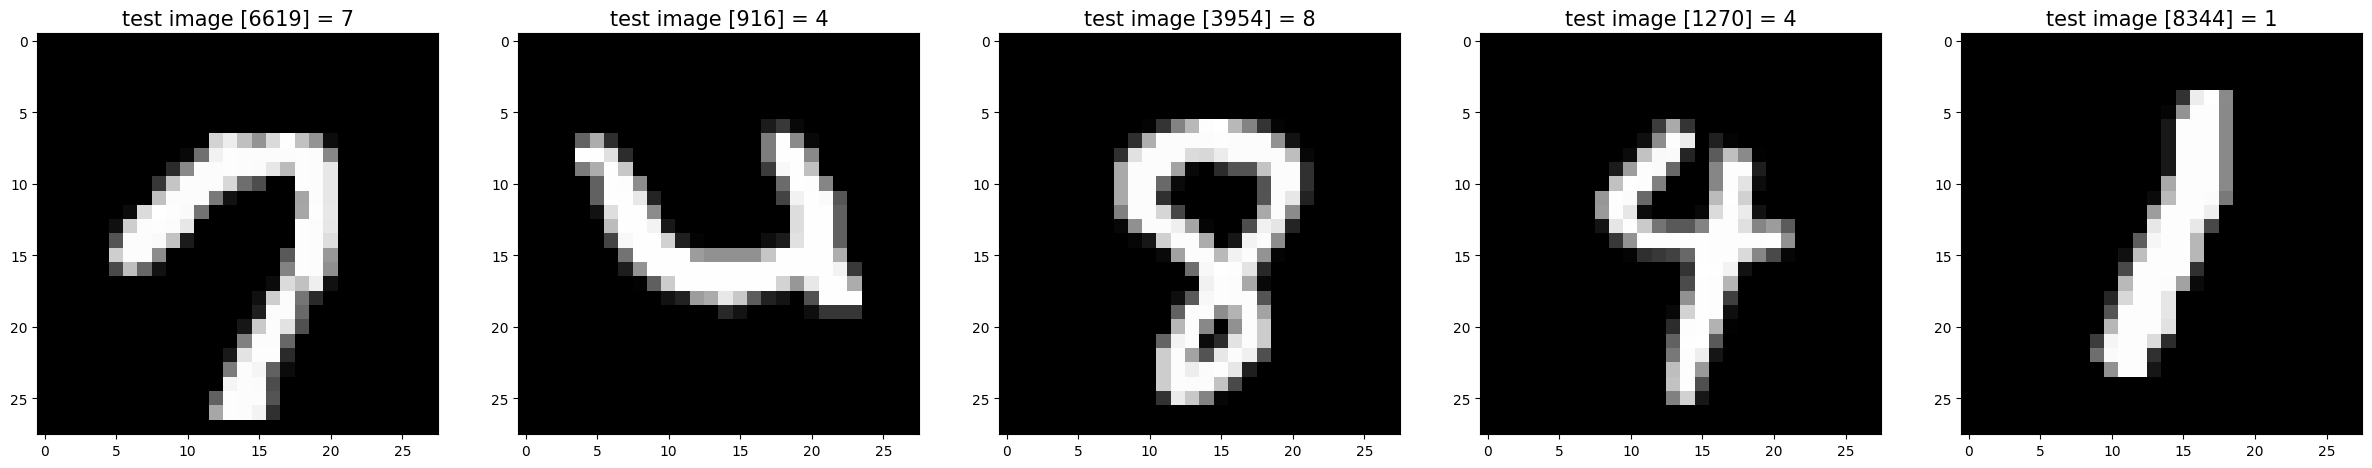

In [11]:
#
# Set file paths based on added MNIST Datasets
#
input_path = './input'
# training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
# training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')
# input/t10k-images.idx3-ubyte
# /Users/aryan/Desktop/Academics /Semester 4/Data science/Assignment 1/input/t10k-labels.idx1-ubyte

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(test_images_filepath, test_labels_filepath)
(x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

## Part a

In [12]:
len(x_test), len(y_test), len(x_test[0]), len(x_test[0][0])

(10000, 10000, 28, 28)

In [13]:
#ensuring correct shape for MNIST Data
x_test = np.array(x_test).reshape(len(x_test), -1)  #Flatten to (10000, 784)
y_test = np.array(y_test)

In [14]:
from sklearn.metrics import rand_score
from scipy.spatial.distance import cdist
np.random.seed(2)

In [15]:
class KMeansPP:
    def __init__(self, clusters=10, max_iters=15, tol=1e-4):
        self.clusters = clusters  
        self.max_iters = max_iters  
        self.tol = tol  #convergence threshold
        self.cluster_labels = None  

    def initialize_centroids(self, data):
        #Selects centroid randomly
        centroids = [data[np.random.choice(len(data))]]
        
        #Selects remaining centroids
        for _ in range(1, self.clusters):
            distances = np.min(cdist(data, centroids), axis=1)
            distances /= distances.sum()
            cum_prob = np.cumsum(distances)
            
            rand_val = np.random.rand()
            for idx, value in enumerate(cum_prob):
                if rand_val < value:
                    centroids.append(data[idx])
                    break
        return np.array(centroids)

    def cluster_data(self, data):
        #Initializes centroids
        self.centroids = self.initialize_centroids(data)
        self.cluster_labels = np.zeros(len(data))
        iteration = 0

        while iteration < self.max_iters:
            dist_matrix = cdist(data, self.centroids)
            self.cluster_labels = np.argmin(dist_matrix, axis=1)
            prev_centroids = self.centroids.copy()

            for cluster_idx in range(self.clusters):
                points_in_cluster = self.cluster_labels == cluster_idx
                if np.sum(points_in_cluster) == 0:
                    continue
                self.centroids[cluster_idx] = np.mean(data[points_in_cluster], axis=0)

            if np.linalg.norm(self.centroids - prev_centroids) < self.tol:
                break

            iteration += 1

    def assign_clusters(self, data):
        dist_matrix = cdist(data, self.centroids)
        return np.argmin(dist_matrix, axis=1)

In [16]:
kmeans = KMeansPP(clusters=10, max_iters=20)
kmeans.cluster_data(x_test)

predicted_labels = kmeans.assign_clusters(x_test)

rand_index_kmeans = rand_score(y_test, predicted_labels)
print(f"Rand index (K-Means++): {rand_index_kmeans}")

Rand index (K-Means++): 0.8914951095109511


## Part (b)

In [17]:
class KCenterClustering:
    def __init__(self, num_clusters=10):
        self.num_clusters = num_clusters  
        self.cluster_assignments = None  

    def cluster_data(self, dataset):
        """Performs K-Center clustering using NumPy only."""
        num_points, num_features = dataset.shape
        self.centroids = np.zeros((self.num_clusters, num_features))
        
        self.centroids[0] = dataset[np.random.choice(num_points)]
        
        for i in range(1, self.num_clusters):
            distances = np.min(np.linalg.norm(dataset[:, None] - self.centroids[:i], axis=2), axis=1)
            
            self.centroids[i] = dataset[np.argmax(distances)]
        
        self.cluster_assignments = np.argmin(np.linalg.norm(dataset[:, None] - self.centroids, axis=2), axis=1)

    def assign_clusters(self, dataset):
        """Assigns clusters to new data points."""
        return np.argmin(np.linalg.norm(dataset[:, None] - self.centroids, axis=2), axis=1)

In [18]:
kcenter = KCenterClustering(num_clusters=10)
kcenter.cluster_data(x_test)

predicted_labels_kcenter = kcenter.assign_clusters(x_test)

rand_index_kcenter = rand_score(y_test, predicted_labels_kcenter)
print(f"Rand index (K-Center): {rand_index_kcenter}")

Rand index (K-Center): 0.4895881188118812


## Part (c)

In [19]:
class SingleLinkageClustering:
    def __init__(self, num_clusters=10):
        self.num_clusters = num_clusters 
        self.cluster_assignments = []
        self.N = None 
        self.cluster_ids = None
        self.clusters = None

    def cluster_data(self, X):
        self.N = X.shape[0]
        self.clusters = [[x] for x in X]
        self.cluster_ids = [[i] for i in range(self.N)]
        dist_matrix = np.full((self.N, self.N), np.inf)

        while len(self.clusters) > self.num_clusters:
        
            if len(self.clusters) == self.N:
                dist_matrix = np.linalg.norm(X[:, np.newaxis] - X, axis=2)
        
            id1, id2 = np.unravel_index(
                np.argmin(dist_matrix), dist_matrix.shape)
            cluster_id1, cluster_id2 = sorted([id1, id2])

            for i in self.cluster_ids[cluster_id1]:
                dist_matrix[i, self.cluster_ids[cluster_id2]] = np.inf

            
            self.clusters[cluster_id1].extend(self.clusters[cluster_id2])
            self.clusters.pop(cluster_id2)

            self.cluster_ids[cluster_id1].extend(self.cluster_ids[cluster_id2])
            self.cluster_ids.pop(cluster_id2)

        self.cluster_ids = self.cluster_ids
        return self

    def assign_clusters(self, X):
        for x in X:
            cluster_id = -1
            for clust_index, cluster_ids in enumerate(self.cluster_ids):
                if any(np.linalg.norm(X[p] - x) == 0 for p in cluster_ids):
                    cluster_id = clust_index
                    break
            self.cluster_assignments.append(cluster_id)
        return self.cluster_assignments


In [20]:
subset = x_test[:1000] #kernel was crashing, hence subset used
subset_y = y_test[:1000]

In [21]:
single_link = SingleLinkageClustering(num_clusters=10)
single_link.cluster_data(subset)

predicted_labels_single = single_link.assign_clusters(subset)

rand_index_single = rand_score(subset_y, predicted_labels_single)
print(f"Rand index (Single Linkage): {rand_index_single}")

Rand index (Single Linkage): 0.11675675675675676


## Part (d)

In [22]:
class kRankApprox:
  def __init__(self,rank,k,model):
    self.rank = rank 
    self.k = k 
    self.model = model 
    self.learner= None  
  
  def cluster_data(self,X):
    u,sigma,v = np.linalg.svd(X,full_matrices=False)
    u_rank = u[:, :self.rank]
    sigma_rank = np.diag(sigma[:self.rank])
    v_rank = v[:self.rank, :]
    x_approx = np.dot(np.dot(u_rank,sigma_rank),v_rank)
    
    learner = self.model(self.k)
    learner.cluster_data(x_approx)
    self.learner = learner
    return
  
  def get_rand_index(self,X, y):
    labels = self.learner.assign_clusters(X)
    return rand_score(y, labels)

In [23]:
X_train = np.copy(x_test)
y_train = np.copy(y_test)

In [24]:
models = [KMeansPP, KCenterClustering]
columss = ["K-means", "K-centers"]
ranks = [2, 5, 10]

results = []
for i, model in enumerate(models):
    col = columss[i]
    res_col = []
    for rank in ranks:
        learner = kRankApprox(rank=rank, k=10, model=model)
        learner.cluster_data(X_train)
        res = learner.get_rand_index(X_train, y_train)
        res_col.append(res)
    results.append(res_col)

pd.DataFrame(results, columns=ranks, index=columss) #for representation

,2,5,10
K-means,0.832987,0.870706,0.882214
K-centers,0.670434,0.800936,0.734799


## Question 5

Suppose you have a population of 1 million people, out of which at least 1% are coffee drinkers. You want
to get the estimate of this fraction by using sampling. Give the algorithm and the estimate. What kind
of error bounds can you give with probability 99%?

### Solution 

#### Algorithm 

The algorithm to estimate this fraction by using sampling is as follows: 

1. We assume that our initial dataset, N = 1 mil, is randomized. 
2. We will **uniformly and randomly** take a smaller subset out of this, say $n$

    or each point has probability of choosing => 

    $$ 1/N $$

    Here, ($n \leq N$)
        
    (Note: The larger the n, the better the estimate).

3. Now, out of n, we will check the labels 0 "Not Coffee Drinker" and 1 "Coffee Drinker", and compute the count for each of these.
4. Then we will calculate the following ratios:

    (a) $$label\_zero\_count / (n) $$
    (b) $$label\_one\_count / (n) \ or \ X$$
5. (b) can be said to be approximately 0.01. <br> (a) will be approximately 99.99.

    (This is because of the estimate proven below.)

#### Estimate

We know that for N, $$p (or \ number \ of \ coffee \ drinkers) = 0.01$$ <br> 'p' indicates the fraction. Which for N turns out to be 10,000. 

Let, the estimate be, 


$$\hat{p} = \frac{X}{n}$$

Here,  X  is the number of coffee drinkers in the sample of size  n.

Now, we know that if the sampling is **uniform and random**, as we mentioned above, 
then, We can say,  $X \sim \text{Binomial}(n, p) $. 

This is because, the present problem can be modelled as a binomial selection problem. 

Hence, $
\mathbb{E}[\hat{p}] = p
$

**More intuition:** <br>

$X$￼ follows a Binomial distribution because we are conducting ￼ independent Bernoulli trials, where each person in the sample has a fixed probability ￼ of being a coffee drinker. If sampling is with replacement, each draw is independent, making ￼. If sampling is without replacement, the exact distribution is Hypergeometric, but when ￼, the Binomial approximation holds well. This is because the probability of selecting a coffee drinker remains nearly constant across draws. 

#### Error bounds that give 99% probability?

Using Hoeffding’s inequality:  

$$
P(|\hat{p} - p| \geq \epsilon) \leq 2e^{-2n\epsilon^2}
$$

For a **99% confidence bound**, we set:  

$$
2e^{-2n\epsilon^2} \leq 0.01
$$

This is because $P(|\hat{p} - p| \geq \epsilon)$ indicated the probability of error being greater the $(\epsilon * 100)\%$. And we want the probability of error being less than 1% or we ant 99% confidence or $1- P(|\hat{p} - p| \geq \epsilon) = 0.99$. Hence we make the equation such. 


Taking the natural logarithm:  

$$
-2n\epsilon^2 \leq \ln(0.005)
$$

Approximating $ \ln(0.005) \approx -5.3 $, we get:  

$$
2n\epsilon^2 \geq 5.3
$$

For a **±1% error bound** $( \epsilon = 0.01 )$:  

$$
2n(0.01)^2 \geq 5.3
$$

Note: We are using  $( \epsilon = 0.01 )$ as one case, we can use other error bounds as well. Example: **±1%, 10%, 15% etc. error bound**
<br>
$$
2n(0.0001) \geq 5.3
$$

$$
n \geq \frac{5.3}{0.0002} = 26500
$$

Thus, a sample size of **$( n \geq 26,500 )$** ensures that our estimate is within **±1% accuracy** with **99% confidence**.

#### Additional

The image (in Github repo) is from the book **Foundations of Data Science**, based on this we can use Hoeffding bound for this given situation to establish our error bound. 

In this case, we may even use **Chernoff Bound**. This choice depends on the situation.